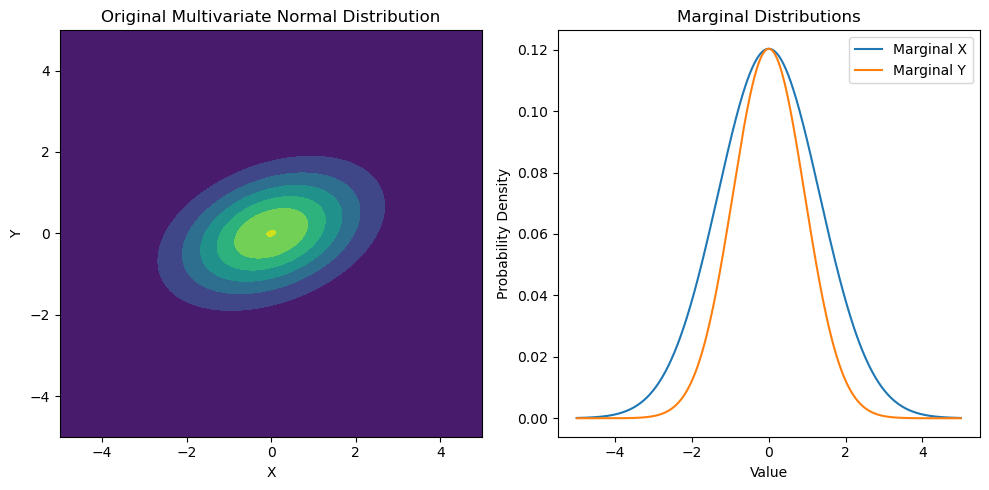

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for the multivariate normal distribution
mean = [0, 0]
covariance = [[2, 0.5], [0.5, 1]]

# Create a multivariate normal distribution object
mvn = multivariate_normal(mean=mean, cov=covariance)

# Plot the contour plot of the original distribution
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(x, y, mvn.pdf(pos), cmap='viridis')
plt.title('Original Multivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')

# Marginalize the distribution by integrating over one dimension
marginal_x = lambda x: mvn.pdf([x, 0])
marginal_y = lambda y: mvn.pdf([0, y])

# Plot the marginal distributions
plt.subplot(1, 2, 2)
plt.plot(np.linspace(-5, 5, 500), [marginal_x(x_val) for x_val in np.linspace(-5, 5, 500)], label='Marginal X')
plt.plot(np.linspace(-5, 5, 500), [marginal_y(y_val) for y_val in np.linspace(-5, 5, 500)], label='Marginal Y')
plt.title('Marginal Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


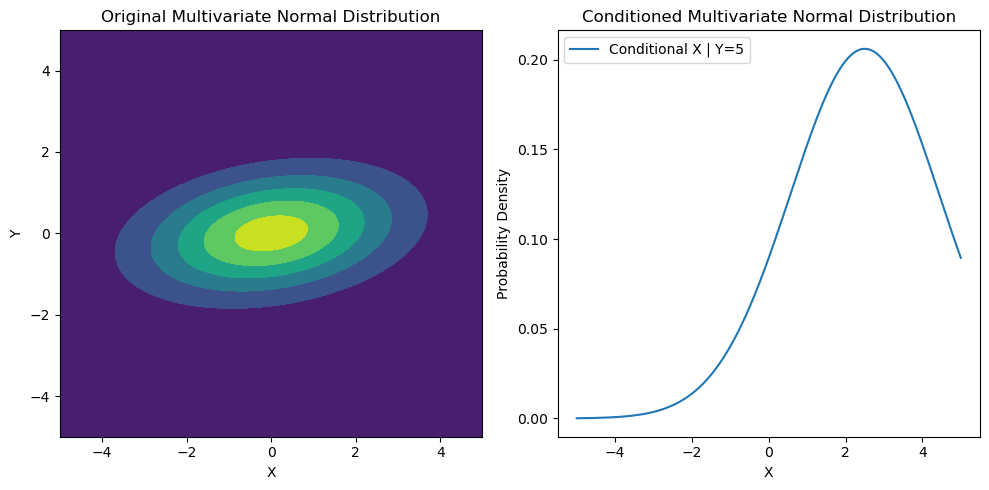

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for the multivariate normal distribution
mean = [0, 0]
covariance = [[4, 0.5], [0.5, 1]]

# Create a multivariate normal distribution object
mvn = multivariate_normal(mean=mean, cov=covariance)

# Plot the contour plot of the original distribution
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(x, y, mvn.pdf(pos), cmap='viridis')
plt.title('Original Multivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')

# Condition on a specific value of Y
y_condition = 5

# Calculate the conditional distribution of X given Y
mean_conditioned = mean[0] + covariance[0][1] / covariance[1][1] * (y_condition - mean[1])
covariance_conditioned = covariance[0][0] - covariance[0][1] * covariance[1][0] / covariance[1][1]

# Create a conditioned multivariate normal distribution object
mvn_conditioned = multivariate_normal(mean=mean_conditioned, cov=covariance_conditioned)

# Plot the conditional distribution of X given Y
plt.subplot(1, 2, 2)
plt.plot(np.linspace(-5, 5, 500), mvn_conditioned.pdf(np.linspace(-5, 5, 500)), label=f'Conditional X | Y={y_condition}')
plt.title('Conditioned Multivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


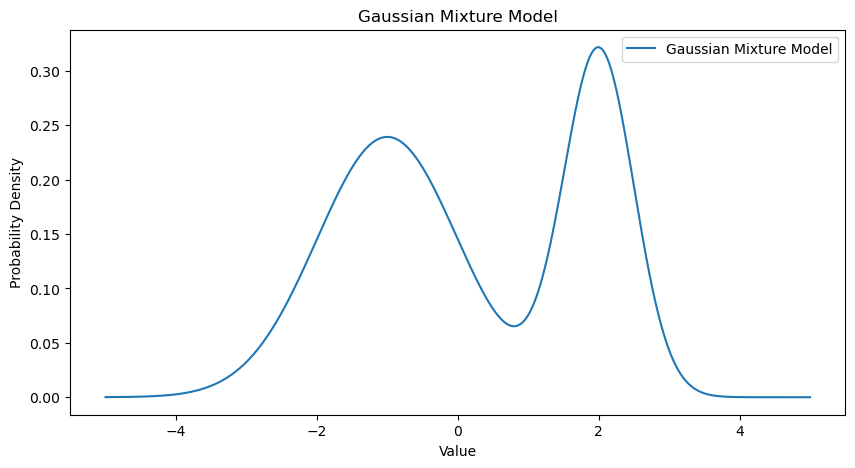

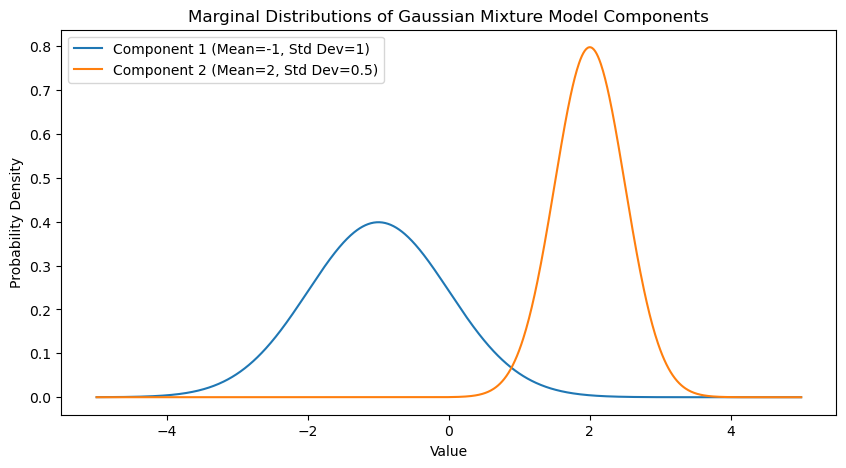

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [-1, 2]       # means of each component
std_devs = [1, 0.5]   # standard deviations of each component

# Define the Gaussian mixture model as a combination of individual normal distributions
def gaussian_mixture(x):
    return sum(w * norm.pdf(x, loc=mu, scale=sigma) for w, mu, sigma in zip(weights, means, std_devs))

# Plot the Gaussian mixture model
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x, gaussian_mixture(x), label='Gaussian Mixture Model')
plt.title('Gaussian Mixture Model')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Compute and plot the marginal distributions for each component
plt.figure(figsize=(10, 5))
for i, (mu, sigma) in enumerate(zip(means, std_devs)):
    marginal_pdf = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, marginal_pdf, label=f'Component {i+1} (Mean={mu}, Std Dev={sigma})')

plt.title('Marginal Distributions of Gaussian Mixture Model Components')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


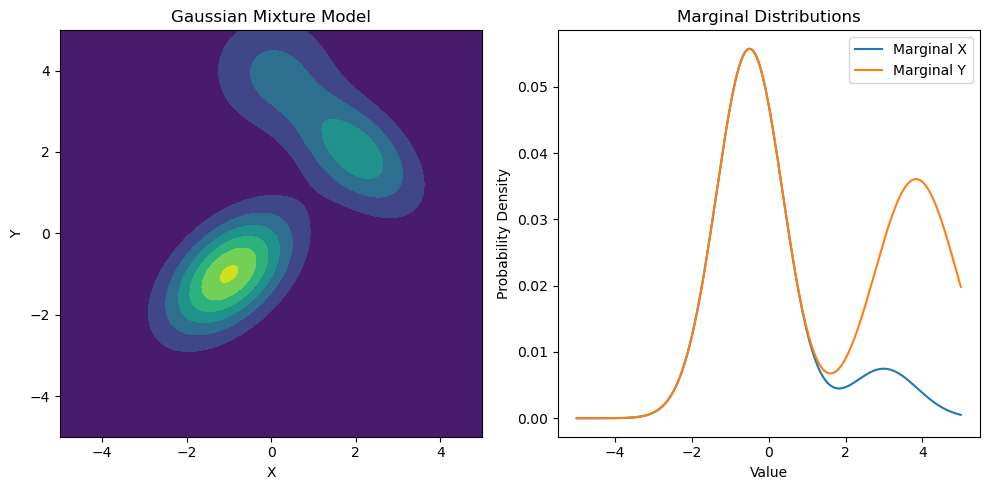

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.5, 0.3, 0.2]  # weights of each component
means = [[-1, -1], [2, 2], [0, 4]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]], [[1, 0], [0, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Plot the contour plot of the Gaussian mixture model
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(x, y, sum(weights[i] * gmm[i].pdf(pos) for i in range(len(weights))), cmap='viridis')
plt.title('Gaussian Mixture Model')
plt.xlabel('X')
plt.ylabel('Y')

# Marginalize the distribution by integrating over one dimension
marginal_x = lambda x: sum(weights[i] * gmm[i].pdf([x, 0]) for i in range(len(weights)))
marginal_y = lambda y: sum(weights[i] * gmm[i].pdf([0, y]) for i in range(len(weights)))

# Plot the marginal distributions
plt.subplot(1, 2, 2)
plt.plot(np.linspace(-5, 5, 500), [marginal_x(x_val) for x_val in np.linspace(-5, 5, 500)], label='Marginal X')
plt.plot(np.linspace(-5, 5, 500), [marginal_y(y_val) for y_val in np.linspace(-5, 5, 500)], label='Marginal Y')
plt.title('Marginal Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


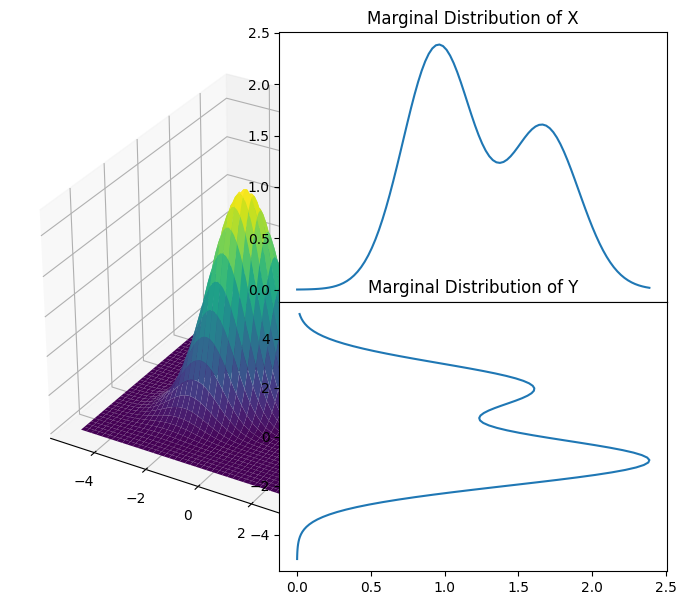

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions on the sides
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

fig.subplots_adjust(hspace=0, wspace=0)
ax_marginal_x = fig.add_subplot(222)
ax_marginal_x.plot(x, marginal_x)
ax_marginal_x.set_title('Marginal Distribution of X')

ax_marginal_y = fig.add_subplot(224)
ax_marginal_y.plot(marginal_y, y)
ax_marginal_y.set_title('Marginal Distribution of Y')

plt.show()


AttributeError: 'YAxis' object has no attribute 'tick_left'

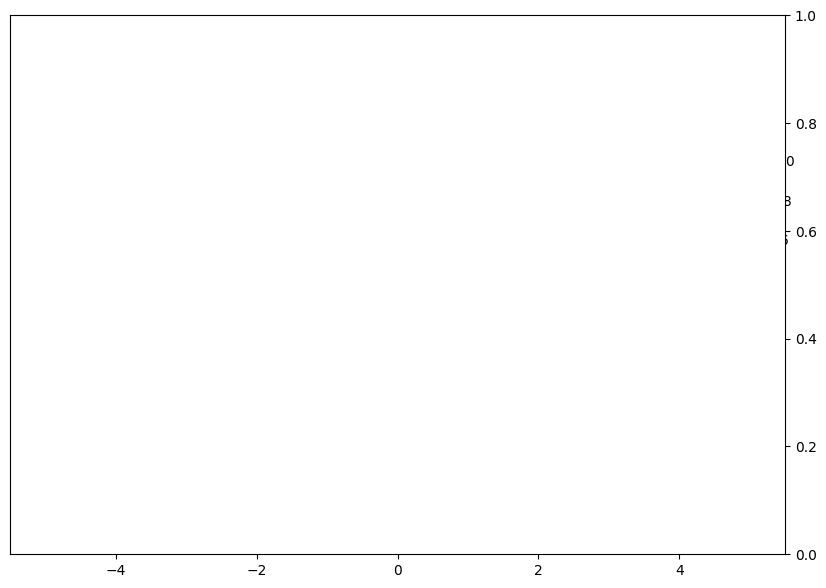

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions on the sides
ax_marginal_x = ax.twinx()
marginal_x = np.sum(Z, axis=0)
ax_marginal_x.plot(x, marginal_x, color='red', alpha=0.7)
ax_marginal_x.set_ylabel('Marginal Distribution of X', color='red')
ax_marginal_x.tick_params(axis='y', labelcolor='red')

ax_marginal_y = ax.twiny()
marginal_y = np.sum(Z, axis=1)
ax_marginal_y.plot(marginal_y, y, color='blue', alpha=0.7)
ax_marginal_y.set_xlabel('Marginal Distribution of Y', color='blue')
ax_marginal_y.tick_params(axis='x', labelcolor='blue')

plt.show()


AttributeError: 'YAxis' object has no attribute 'tick_left'

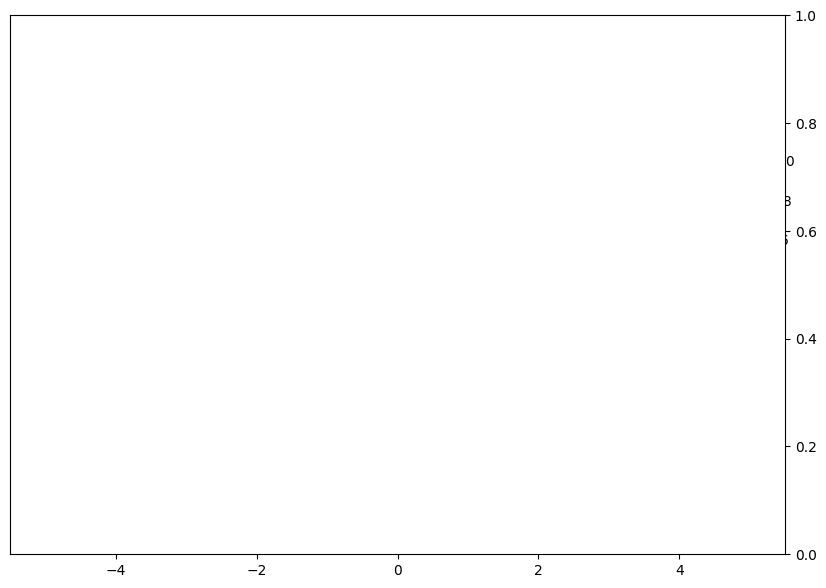

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions on the sides
ax_marginal_x = ax.twinx()
marginal_x = np.sum(Z, axis=0)
ax_marginal_x.plot(x, marginal_x, color='red', alpha=0.7)
ax_marginal_x.set_ylabel('Marginal Distribution of X', color='red')
ax_marginal_x.yaxis.set_label_position('left')
ax_marginal_x.yaxis.tick_left()

ax_marginal_y = ax.twiny()
marginal_y = np.sum(Z, axis=1)
ax_marginal_y.plot(marginal_y, y, color='blue', alpha=0.7)
ax_marginal_y.set_xlabel('Marginal Distribution of Y', color='blue')
ax_marginal_y.xaxis.set_label_position('bottom')
ax_marginal_y.xaxis.tick_bottom()

plt.show()


In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def gauss1(x):
    return np.exp(-(x**2))

def gauss(x, y):
    return gauss1(x)*gauss1(2*y)

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = gauss(X, Y)

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.4, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

AttributeError: 'YAxis' object has no attribute 'tick_left'

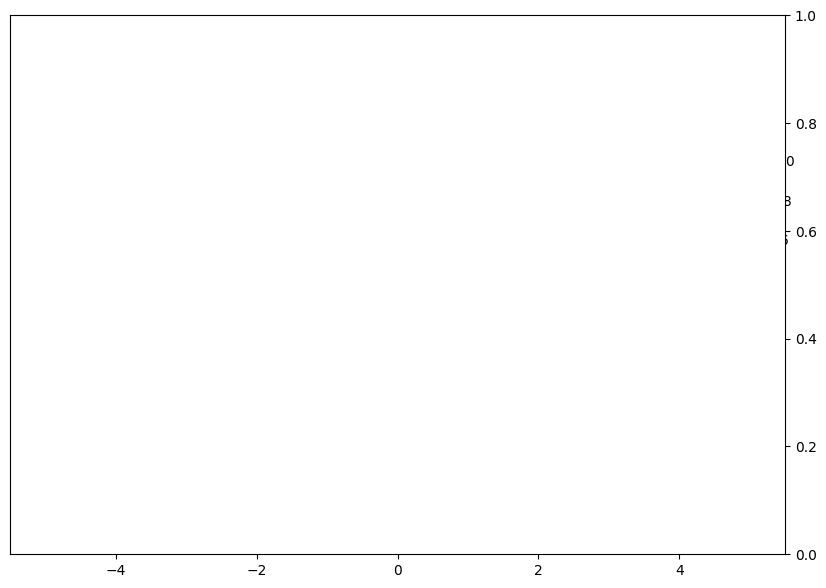

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions on the sides
ax_marginal_x = ax.twinx()
marginal_x = np.sum(Z, axis=0)
ax_marginal_x.plot(x, marginal_x, color='red', alpha=0.7)
ax_marginal_x.set_ylabel('Marginal Distribution of X', color='red')
ax_marginal_x.yaxis.set_ticks_position('left')

ax_marginal_y = ax.twiny()
marginal_y = np.sum(Z, axis=1)
ax_marginal_y.plot(marginal_y, y, color='blue', alpha=0.7)
ax_marginal_y.set_xlabel('Marginal Distribution of Y', color='blue')
ax_marginal_y.xaxis.set_ticks_position('bottom')

plt.show()


AttributeError: 'YAxis' object has no attribute 'tick_left'

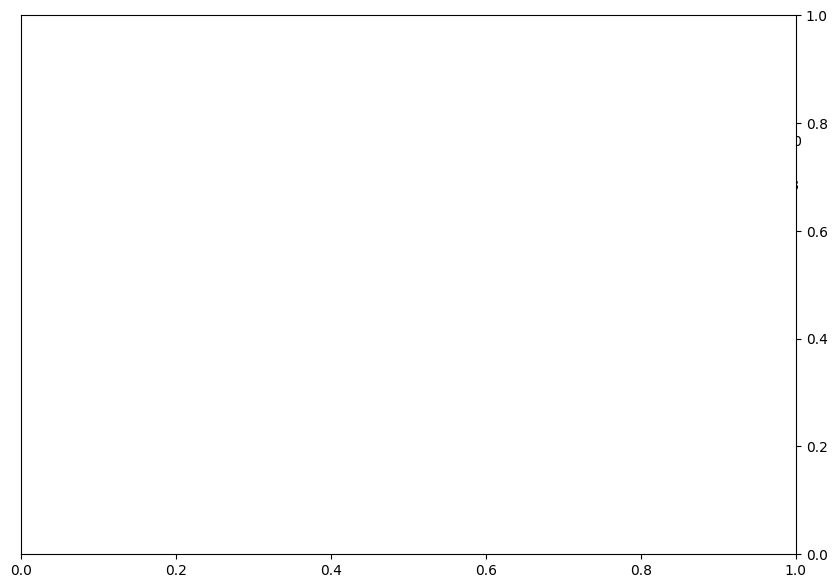

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Plot marginal distributions on the sides
ax_marginal_x = ax.twinx()

plt.show()


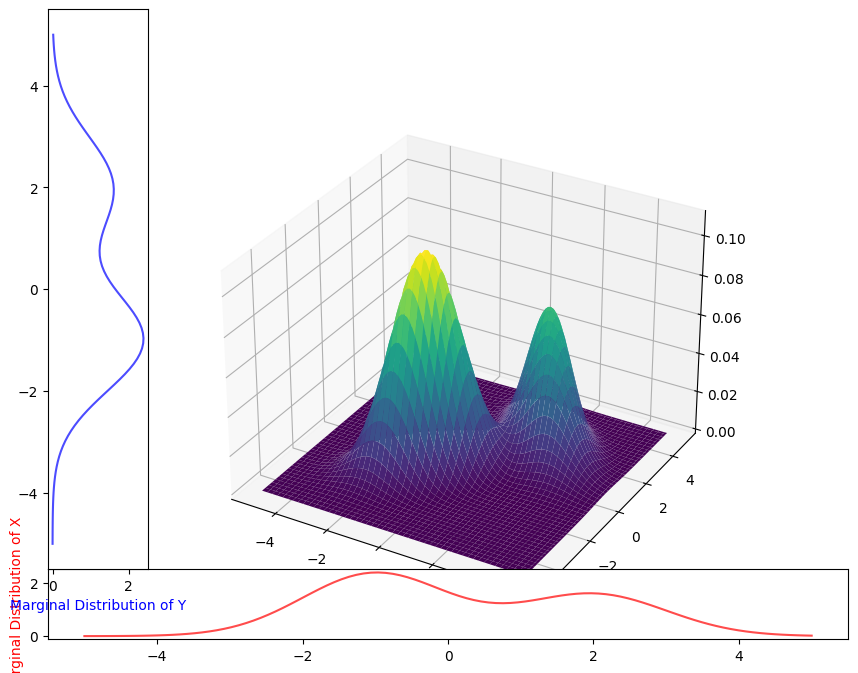

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions on the sides
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Position the marginal plots next to the 3D plot
divider = np.linspace(0, 1, len(marginal_x))
ax_marginal_x = fig.add_axes([0.1, 0.1, 0.8, 0.1])
ax_marginal_x.plot(x, marginal_x, color='red', alpha=0.7)
ax_marginal_x.set_ylabel('Marginal Distribution of X', color='red')
ax_marginal_x.tick_params(axis='y', which='both', direction='out')

ax_marginal_y = fig.add_axes([0.1, 0.2, 0.1, 0.8])
ax_marginal_y.plot(marginal_y, y, color='blue', alpha=0.7)
ax_marginal_y.set_xlabel('Marginal Distribution of Y', color='blue')
ax_marginal_y.tick_params(axis='x', which='both', direction='out')

plt.show()


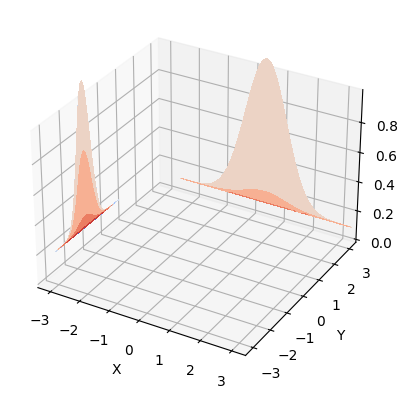

In [23]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def gauss1(x):
    return np.exp(-(x**2))

def gauss(x, y):
    return gauss1(x)*gauss1(2*y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = gauss(X, Y)

#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.4, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

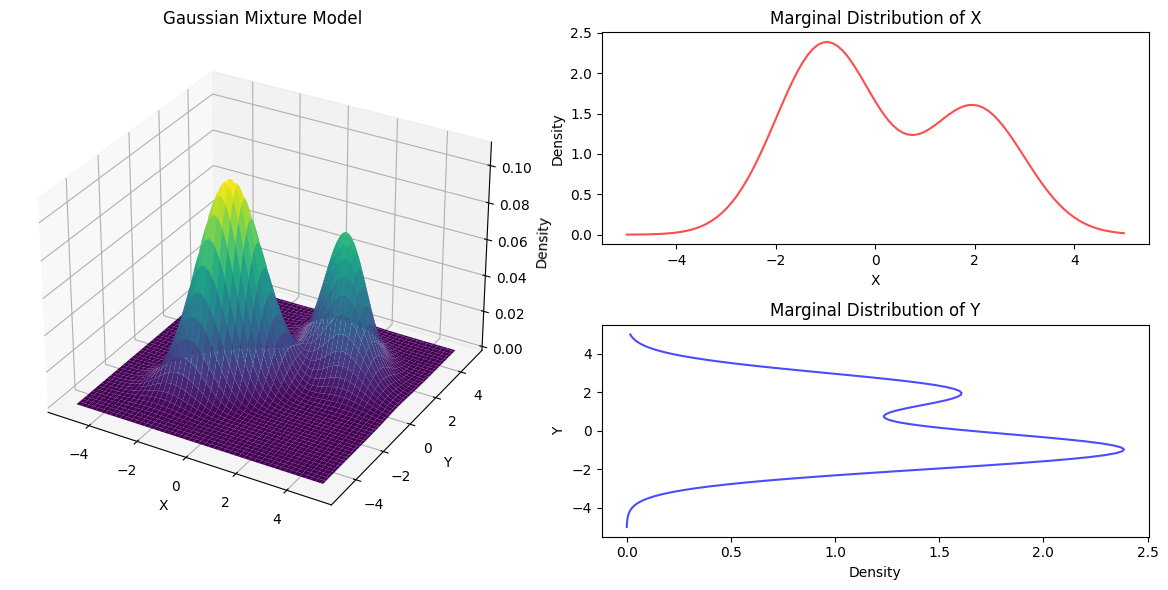

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Compute marginal distributions of the Gaussian mixture model
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot
fig = plt.figure(figsize=(12, 6))

# 3D plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('Gaussian Mixture Model')

# Marginal distributions
ax_marginal_x = fig.add_subplot(222)
ax_marginal_x.plot(x, marginal_x, color='red', alpha=0.7)
ax_marginal_x.set_xlabel('X')
ax_marginal_x.set_ylabel('Density')
ax_marginal_x.set_title('Marginal Distribution of X')

ax_marginal_y = fig.add_subplot(224)
ax_marginal_y.plot(marginal_y, y, color='blue', alpha=0.7)
ax_marginal_y.set_xlabel('Density')
ax_marginal_y.set_ylabel('Y')
ax_marginal_y.set_title('Marginal Distribution of Y')

plt.tight_layout()
plt.show()


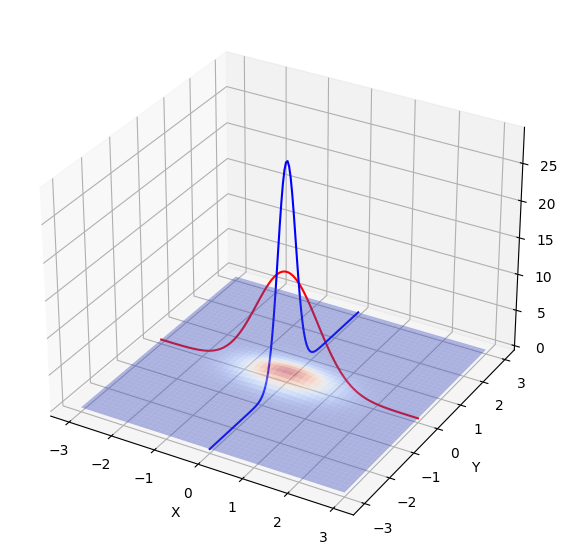

In [22]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def gauss1(x):
    return np.exp(-(x**2))

def gauss(x, y):
    return gauss1(x) * gauss1(2 * y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the range of the plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the Gaussian mixture model
Z = gauss(X, Y)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.4, cmap=cm.coolwarm)

# Plot the marginal distributions on the sides
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions on the sides
ax.plot(x, np.zeros_like(x), marginal_x, color='red')
ax.plot(np.zeros_like(y), y, marginal_y, color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


TypeError: Input z must be 2D, not 1D

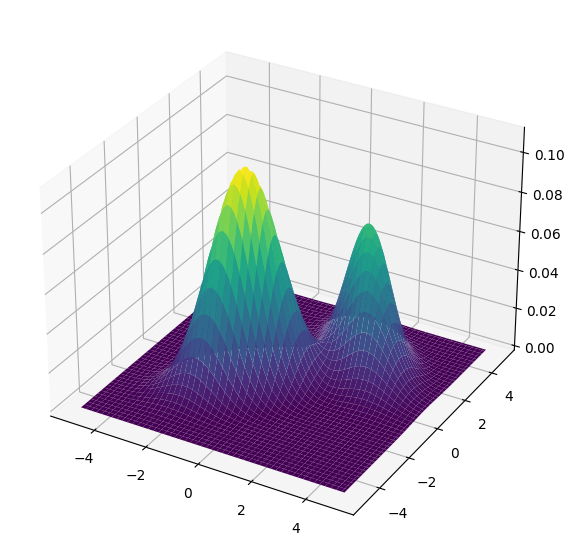

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')


marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

#ax.plot(x, np.zeros_like(x), marginal_x, color='red')
#ax.plot(np.zeros_like(y), y, marginal_y, color='blue')


cset = ax.contourf(x, np.zeros_like(x), marginal_x, zdir='x', offset=-4, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

#cset = ax.contourf(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

In [29]:
X.shape

(100, 100)

In [30]:
Y.shape

(100, 100)

In [31]:
Z.shape

(100, 100)

In [32]:
x.shape

(100,)

In [33]:
marginal_x.shape

(100,)

TypeError: Input z must be 2D, not 1D

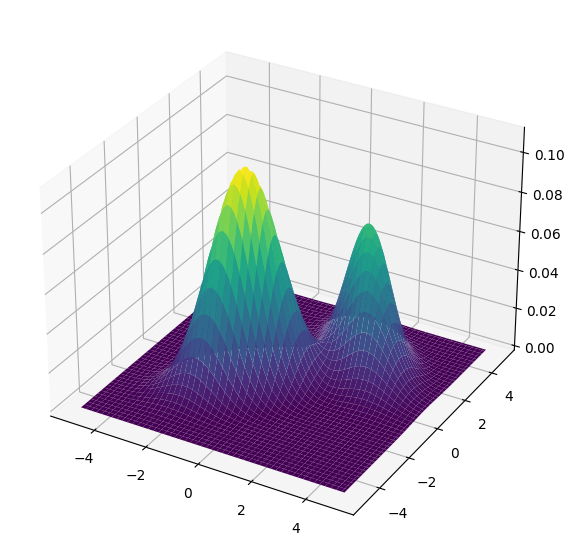

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
ax.contourf(x, y, marginal_x[:, np.newaxis], zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
ax.contourf(x, y, marginal_y[np.newaxis, :], zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


TypeError: Shapes of y (100, 1) and z (100, 100) do not match

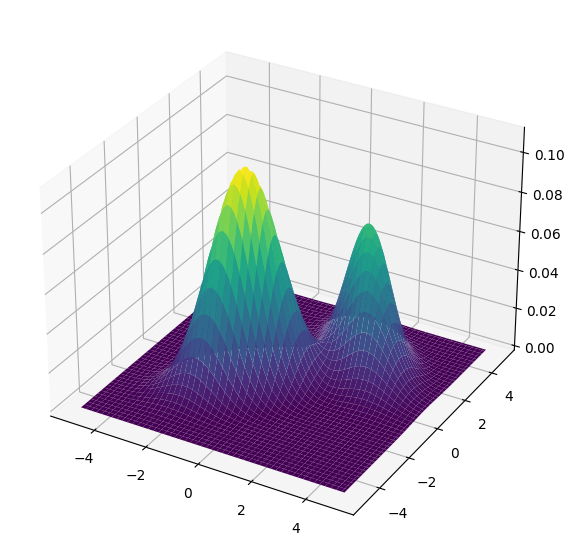

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
X_marginal, Y_marginal = np.meshgrid(x, y)
ax.contourf(X_marginal, Y_marginal, marginal_x.reshape(-1, 1), zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
ax.contourf(X_marginal, Y_marginal, marginal_y.reshape(1, -1), zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


TypeError: Shapes of y (1, 100) and z (100, 100) do not match

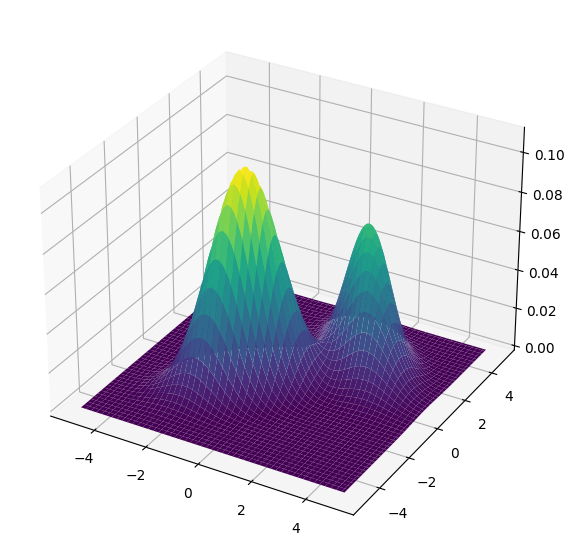

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
ax.contourf(X, Y, marginal_x.reshape(1, -1), zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
ax.contourf(X, Y, marginal_y.reshape(-1, 1), zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


TypeError: Shapes of y (100, 1) and z (100, 100) do not match

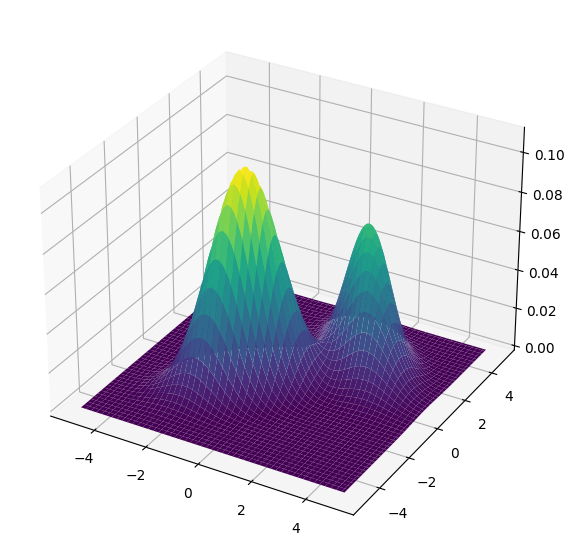

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
ax.contourf(X, Y, marginal_x.reshape(1, -1).T, zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
ax.contourf(X, Y, marginal_y.reshape(-1, 1).T, zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [41]:
X.shape

(100, 100)

In [42]:
 marginal_x.shape

(100,)

In [43]:
 marginal_x.reshape(1, -1).shape

(1, 100)

In [44]:
Z.shape

(100, 100)

ValueError: cannot reshape array of size 100 into shape (100,100)

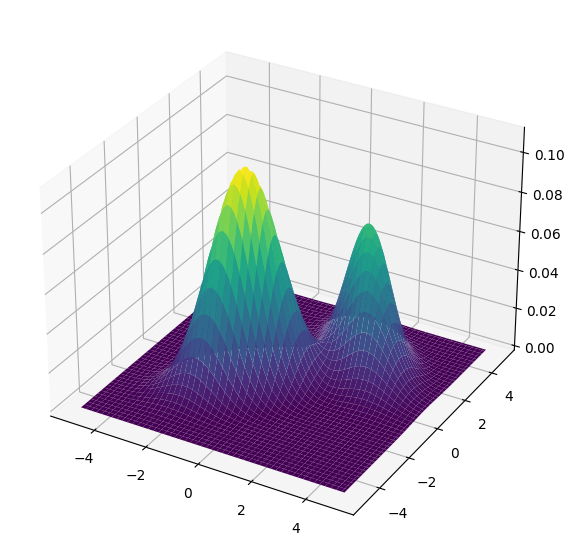

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
ax.contourf(X, Y, marginal_x.reshape(X.shape), zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
ax.contourf(X, Y, marginal_y.reshape(Y.shape), zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


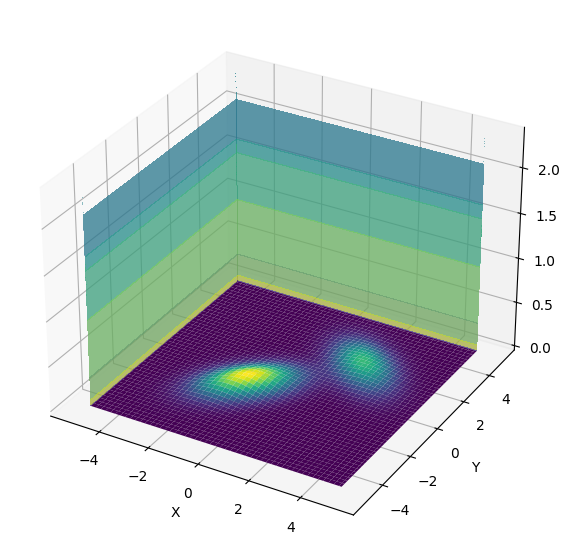

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
ax.contourf(X, Y, np.broadcast_to(marginal_x, X.shape), zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
ax.contourf(X, Y, np.broadcast_to(marginal_y, Y.shape).T, zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


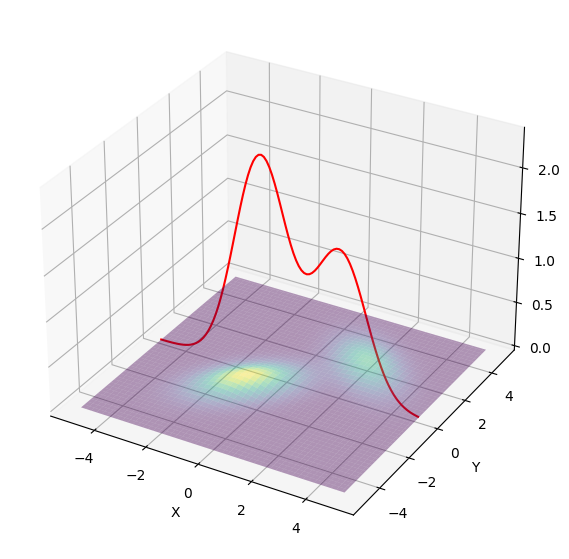

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4)

# Plot marginal distributions
marginal_x = np.sum(Z, axis=0)
marginal_y = np.sum(Z, axis=1)

# Plot the marginal distributions alongside the 3D plot
ax.plot(x, np.zeros_like(x), marginal_x, color='red')
#ax.contour(X, Y, (marginal_y * np.ones_like(X)), zdir='x', offset=np.min(X), cmap='viridis', alpha=0.5)
#ax.contourf(X, Y, marginal_y * np.ones_like(X), zdir='y', offset=np.max(Y), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [58]:
Z.shape

(100, 100)

In [60]:
marginal_x.shape

(100,)

In [61]:
(marginal_y * np.ones_like(X)).shape

(100, 100)

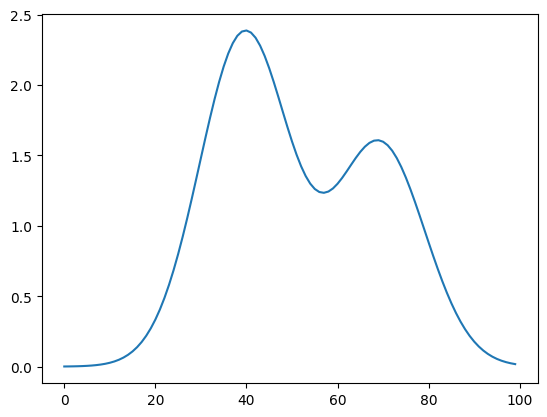

In [63]:
plt.plot(marginal_y)

In [83]:
Z

array([[2.57019620e-06, 3.34190325e-06, 4.28660339e-06, ...,
        1.21183949e-12, 1.32297845e-12, 1.42479463e-12],
       [3.34190325e-06, 4.37497475e-06, 5.65000802e-06, ...,
        2.55916802e-12, 2.77493225e-12, 2.96823174e-12],
       [4.28660339e-06, 5.65000802e-06, 7.34643533e-06, ...,
        5.33143763e-12, 5.74174413e-12, 6.10007497e-12],
       ...,
       [1.21183949e-12, 2.55916802e-12, 5.33143763e-12, ...,
        1.16733159e-08, 6.59023297e-09, 3.67051284e-09],
       [1.32297845e-12, 2.77493225e-12, 5.74174413e-12, ...,
        6.59023297e-09, 3.69569021e-09, 2.04465905e-09],
       [1.42479463e-12, 2.96823174e-12, 6.10007497e-12, ...,
        3.67051284e-09, 2.04465905e-09, 1.12372640e-09]])

In [82]:
marginal_x

array([2.57019620e-06, 3.34190325e-06, 4.28660339e-06, 5.42406103e-06,
       6.77060794e-06, 8.33724569e-06, 1.01276659e-05, 1.21363466e-05,
       1.43469111e-05, 1.67309530e-05, 1.92475202e-05, 2.18434244e-05,
       2.44544837e-05, 2.70077315e-05, 2.94245310e-05, 3.16244388e-05,
       3.35295666e-05, 3.50691214e-05, 3.61837577e-05, 3.68293693e-05,
       3.69799851e-05, 3.66295021e-05, 3.57920962e-05, 3.45012704e-05,
       3.28076312e-05, 3.07755977e-05, 2.84793421e-05, 2.59983175e-05,
       2.34127468e-05, 2.07994249e-05, 1.82281302e-05, 1.57588583e-05,
       1.34399982e-05, 1.13074717e-05, 9.38477015e-06, 7.68375673e-06,
       6.20605195e-06, 4.94480354e-06, 3.88664174e-06, 3.01364307e-06,
       2.30515935e-06, 1.73940985e-06, 1.29477627e-06, 9.50778543e-07,
       6.88740859e-07, 4.92180222e-07, 3.46963909e-07, 2.41288310e-07,
       1.65531288e-07, 1.12025204e-07, 7.47899468e-08, 4.92563856e-08,
       3.20017473e-08, 2.05105203e-08, 1.29679550e-08, 8.08831675e-09,
      

In [91]:
from scipy.stats.gaussian_kde import marginal
m = marginal(Z)

ModuleNotFoundError: No module named 'scipy.stats.gaussian_kde'

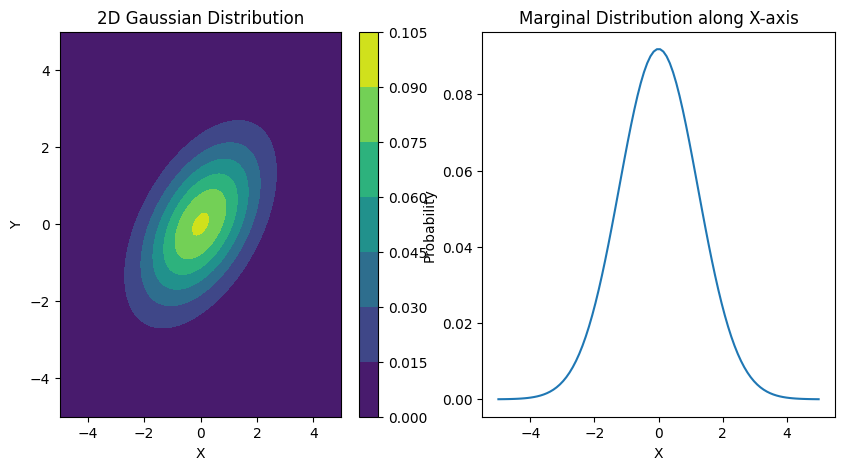

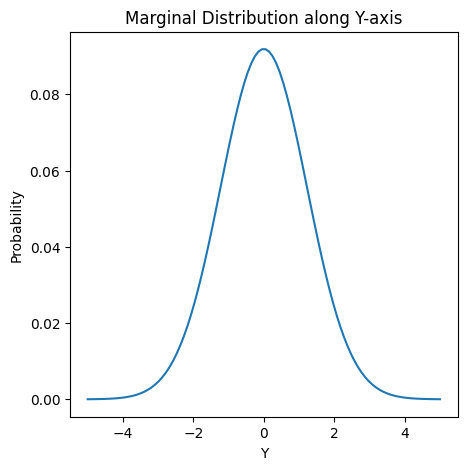

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the 2D Gaussian distribution
mu = np.array([0, 0])  # Mean
covariance = np.array([[2, 1], [1, 2]])  # Covariance matrix

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Create the multivariate Gaussian distribution
rv = multivariate_normal(mu, covariance)

# Calculate the marginal distributions
marginal_x = rv.pdf(np.vstack((x, np.zeros_like(x))).T)
marginal_y = rv.pdf(np.vstack((np.zeros_like(y), y)).T)

# Plot the 2D Gaussian distribution
plt.figure(figsize=(10, 5))

# Plot the 2D Gaussian distribution
plt.subplot(1, 2, 1)
plt.contourf(X, Y, rv.pdf(pos), cmap='viridis')
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

# Plot the marginal distribution along the x-axis
plt.subplot(1, 2, 2)
plt.plot(x, marginal_x)
plt.title('Marginal Distribution along X-axis')
plt.xlabel('X')
plt.ylabel('Probability')

# Plot the marginal distribution along the y-axis
plt.figure(figsize=(5, 5))
plt.plot(y, marginal_y)
plt.title('Marginal Distribution along Y-axis')
plt.xlabel('Y')
plt.ylabel('Probability')

plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Parameters for the 3D Gaussian distribution
mu = np.array([0, 0, 0])  # Mean
covariance = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Covariance matrix

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)
X, Y, Z = np.meshgrid(x, y, z)
pos = np.dstack((X, Y, Z))

# Create the multivariate Gaussian distribution
rv = multivariate_normal(mu, covariance)

# Calculate the probability density function values
pdf = rv.pdf(pos)

# Plot the 3D Gaussian distribution
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the Gaussian distribution surface
ax.plot_surface(X, Y, pdf, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('3D Gaussian Distribution')

plt.show()


ValueError: operands could not be broadcast together with shapes (100,100,300) (3,) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the 2D Gaussian distribution
mu = np.array([0, 0])  # Mean
covariance = np.array([[2, 1], [1, 2]])  # Covariance matrix

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4)




# Create the multivariate Gaussian distribution
rv = multivariate_normal(mu, covariance)

# Calculate the marginal distributions
marginal_x = rv.pdf(np.vstack((x, np.zeros_like(x))).T)
marginal_y = rv.pdf(np.vstack((np.zeros_like(y), y)).T)

# Plot the 2D Gaussian distribution
plt.figure(figsize=(10, 5))

# Plot the 2D Gaussian distribution
plt.subplot(1, 2, 1)
plt.contourf(X, Y, rv.pdf(pos), cmap='viridis')
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

# Plot the marginal distribution along the x-axis
plt.subplot(1, 2, 2)
plt.plot(x, marginal_x)
plt.title('Marginal Distribution along X-axis')
plt.xlabel('X')
plt.ylabel('Probability')

# Plot the marginal distribution along the y-axis
plt.figure(figsize=(5, 5))
plt.plot(y, marginal_y)
plt.title('Marginal Distribution along Y-axis')
plt.xlabel('Y')
plt.ylabel('Probability')

plt.show()


NameError: name 'weights' is not defined

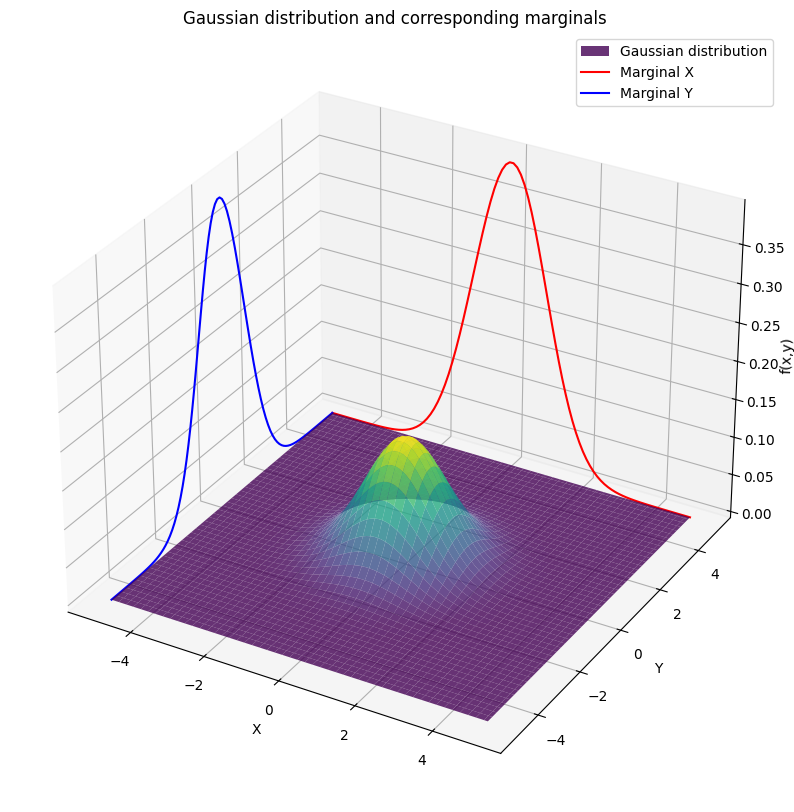

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
# Parameters for the Gaussian distribution
mu = np.array([0, 0])  # mean
covariance = np.array([[1, 0], [0, 1]])  # covariance matrix

# Create grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Calculate Gaussian values
inv_covariance = np.linalg.inv(covariance)
det_covariance = np.linalg.det(covariance)
factor = 1. / (2 * np.pi * np.sqrt(det_covariance))
exponent = -0.5 * np.einsum('...k,kl,...l->...', pos - mu, inv_covariance, pos - mu)
gaussian = factor * np.exp(exponent)

# Plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, gaussian, cmap='viridis', alpha=0.8, label="Gaussian distribution")

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
ax.plot(x, norm.pdf(x, mu[0], covariance[0][0]),zs=5, zdir='y', color='red', label="Marginal X")
ax.plot(y, norm.pdf(y, mu[1], covariance[1][1]),zs=-5, zdir='x', color='blue', label="Marginal Y")
# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)', labelpad=1)
ax.set_title("Gaussian distribution and corresponding marginals")
ax.legend()

plt.savefig("gauss_with_marginals.png")
plt.show()


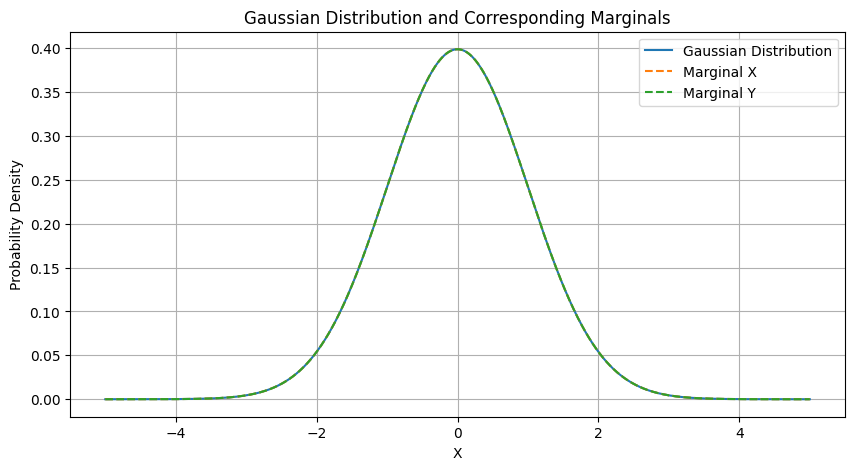

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mu = 0  # mean
sigma = 1  # standard deviation
mu = np.array([0, 0])  # mean
covariance = np.array([[1, 0], [0, 1]])  # covariance matrix

# Create x values
x = np.linspace(-5, 5, 1000)

# Gaussian distribution
gaussian = norm.pdf(x, mu, sigma)

# Plot the Gaussian distribution
plt.figure(figsize=(10, 5))
plt.plot(x, gaussian, label='Gaussian Distribution')

# Plot the marginal distributions
plt.plot(x, norm.pdf(x, mu, sigma), label='Marginal X', linestyle='--')
plt.plot(x, norm.pdf(x, mu, sigma), label='Marginal Y', linestyle='--')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution and Corresponding Marginals')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
weights[1]

0.4

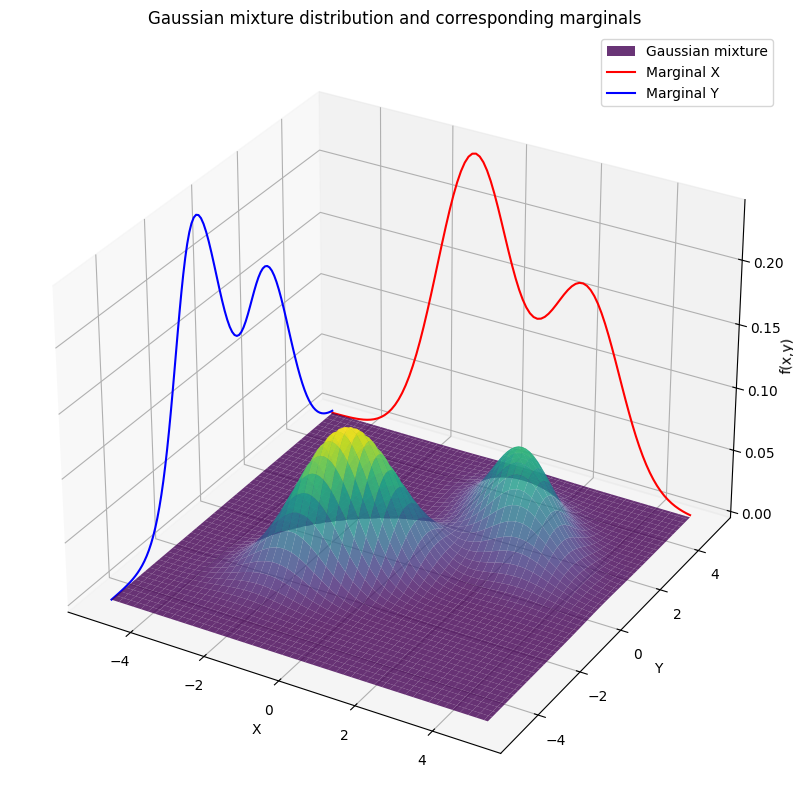

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Define parameters for the Gaussian mixture model
weights = [0.6, 0.4]  # weights of each component
means = [[-1, -1], [2, 2]]  # means of each component
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]  # covariance matrices of each component

# Create a Gaussian mixture model object
gmm = []
for i in range(len(weights)):
    gmm.append(multivariate_normal(mean=means[i], cov=covariances[i]))

# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(weights)):
    Z += weights[i] * gmm[i].pdf(np.dstack((X, Y)))

# Plot 3D surface
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, label="Gaussian mixture")

# Calculate marginal distributions
#marginal_x = np.sum(Z, axis=0) #* (x[1] - x[0])  # Integration over y
#marginal_y = np.sum(Z, axis=1)# * (y[1] - y[0])  # Integration over x

# Plot the marginal distributions alongside the 3D plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
ax.plot(x, weights[0]*norm.pdf(x, means[0][0], covariances[0][0][0]) +weights[1]*norm.pdf(x, means[1][0], covariances[1][0][0]) ,zs=5, zdir='y', color='red', label="Marginal X")
ax.plot(y, weights[0]*norm.pdf(y, means[0][1], covariances[0][1][1]) +weights[1]*norm.pdf(y, means[1][1], covariances[1][1][1]) ,zs=-5, zdir='x', color='blue', label="Marginal Y")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)', labelpad=1)
ax.set_title("Gaussian mixture distribution and corresponding marginals")
ax.legend()

plt.savefig("gaussMix_with_marginals.png")
plt.show()


In [142]:
marginal_x

array([7.87863264e-04, 1.17566303e-03, 1.73622980e-03, 2.53765558e-03,
       3.67085537e-03, 5.25555080e-03, 7.44718440e-03, 1.04446707e-02,
       1.44987786e-02, 1.99208003e-02, 2.70909972e-02, 3.64661328e-02,
       4.85852183e-02, 6.40724258e-02, 8.36359905e-02, 1.08061857e-01,
       1.38200849e-01, 1.74948286e-01, 2.19215267e-01, 2.71891281e-01,
       3.33798411e-01, 4.05638125e-01, 4.87932493e-01, 5.80962531e-01,
       6.84707178e-01, 7.98787150e-01, 9.22418302e-01, 1.05437934e+00,
       1.19299842e+00, 1.33616248e+00, 1.48135204e+00, 1.62570274e+00,
       1.76609291e+00, 1.89925461e+00, 2.02190359e+00, 2.13088172e+00,
       2.22330414e+00, 2.29670237e+00, 2.34915444e+00, 2.37939353e+00,
       2.38688763e+00, 2.37188473e+00, 2.33541994e+00, 2.27928357e+00,
       2.20595172e+00, 2.11848323e+00, 2.02038892e+00, 1.91548045e+00,
       1.80770717e+00, 1.70098954e+00, 1.59905743e+00, 1.50530100e+00,
       1.42264033e+00, 1.35341909e+00, 1.29932570e+00, 1.26134414e+00,
      

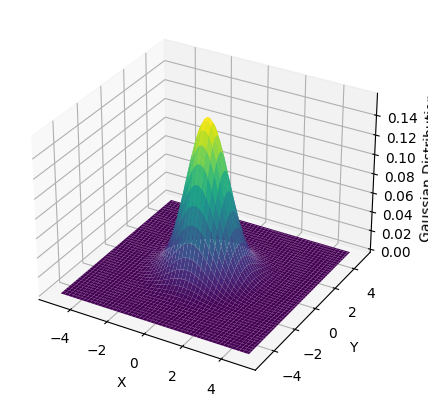

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the Gaussian distribution
mu = np.array([0, 0])  # mean
covariance = np.array([[1, 0], [0, 1]])  # covariance matrix

# Create grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y))

# Calculate Gaussian values
inv_covariance = np.linalg.inv(covariance)
det_covariance = np.linalg.det(covariance)
factor = 1. / (2 * np.pi * np.sqrt(det_covariance))
exponent = -0.5 * np.einsum('...k,kl,...l->...', pos - mu, inv_covariance, pos - mu)
gaussian = factor * np.exp(exponent)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, gaussian, cmap='viridis')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Gaussian Distribution')

plt.show()


In [118]:
from scipy.stats import multivariate_normal as mvn
mvn.pdf(x[0],mu[0], covariance[0])

ValueError: cannot reshape array of size 2 into shape (1,1)